

```
`# This is formatted as code`
```

**1.Sample project for Color detection**

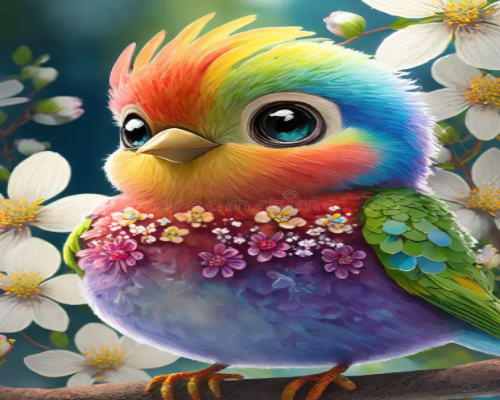

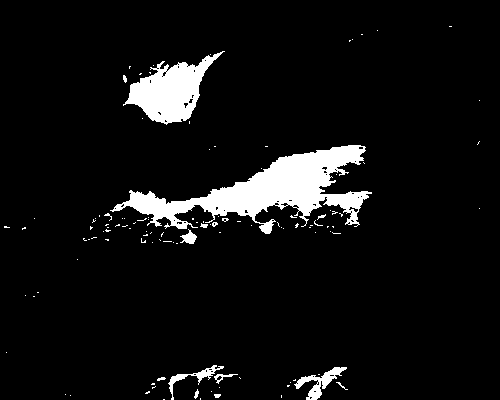

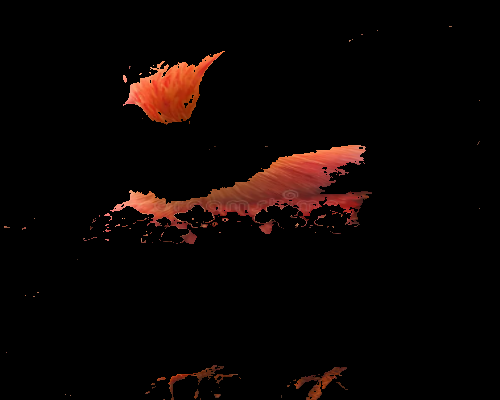

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/Screenshot 2025-03-09 151333.png")
image = cv2.resize(image, (500, 400))

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])


mask = cv2.inRange(hsv, lower_red, upper_red)

result = cv2.bitwise_and(image, image, mask=mask)

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(result)


**2.Data structures for Image Analysis -Write a program that computes the T-pyramid of an image**


Level 0 - Size: 512x512


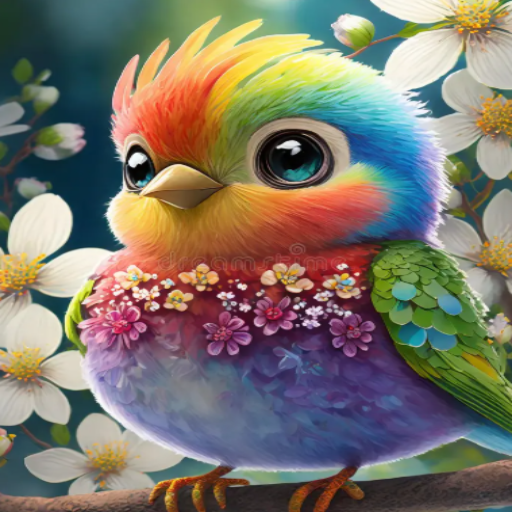

Level 1 - Size: 256x256


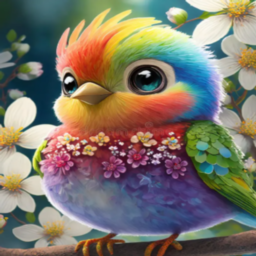

Level 2 - Size: 128x128


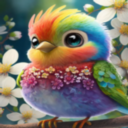

Level 3 - Size: 64x64


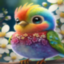

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



image = cv2.imread("/content/Screenshot 2025-03-09 151333.png")
image = cv2.resize(image, (512, 512))

def compute_t_pyramid(image, levels=4):
    pyramid = [image]

    for i in range(1, levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)

    return pyramid

t_pyramid = compute_t_pyramid(image, levels=4)

for i, img in enumerate(t_pyramid):
    print(f"Level {i} - Size: {img.shape[1]}x{img.shape[0]}")
    cv2_imshow(img)

**3.Sample project for Image Smoothing**





Original Image:


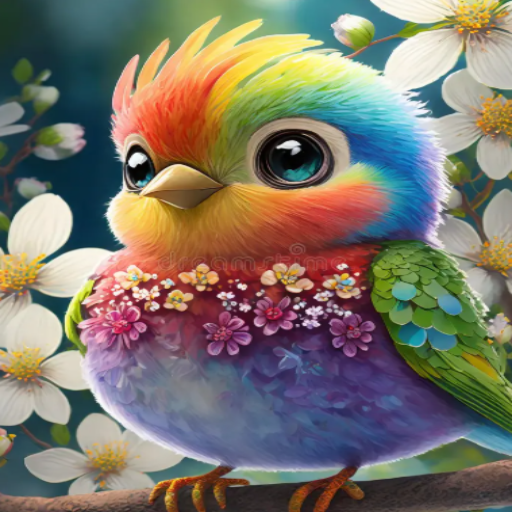

Gaussian Blurred Image:


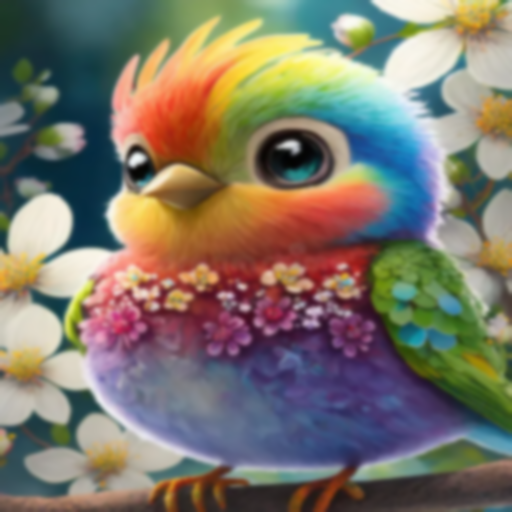

Median Blurred Image:


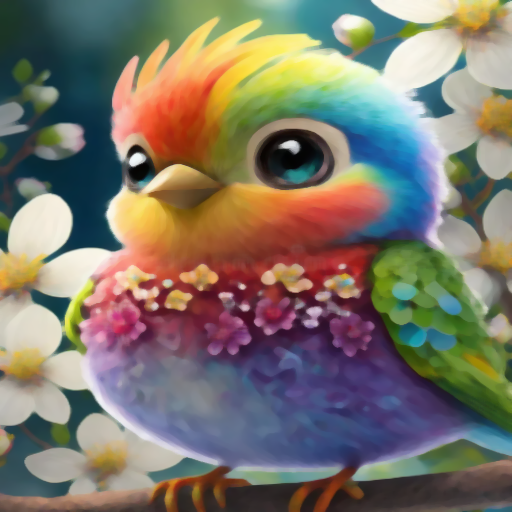

Bilateral Filtered Image:


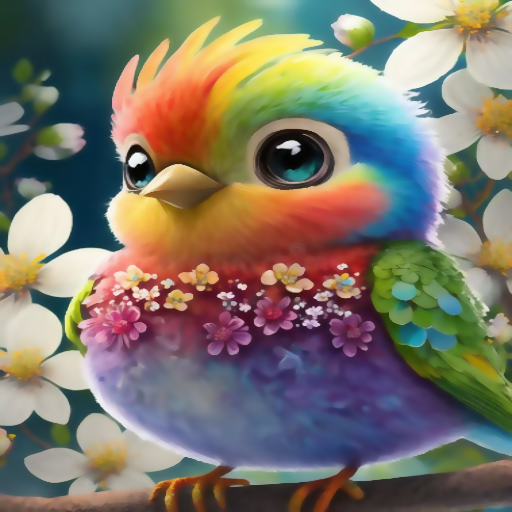

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files



image = cv2.imread("/content/Screenshot 2025-03-09 151333 (1).png")
image = cv2.resize(image, (512, 512))

gaussian_blur = cv2.GaussianBlur(image, (11, 11), 0)

median_blur = cv2.medianBlur(image, 7)

bilateral = cv2.bilateralFilter(image, 9, 75, 75)

print("Original Image:")
cv2_imshow(image)

print("Gaussian Blurred Image:")
cv2_imshow(gaussian_blur)

print("Median Blurred Image:")
cv2_imshow(median_blur)

print("Bilateral Filtered Image:")
cv2_imshow(bilateral)


**4.Sample project for Edge detection using Sobel ,Canny edge.**

Original Image:


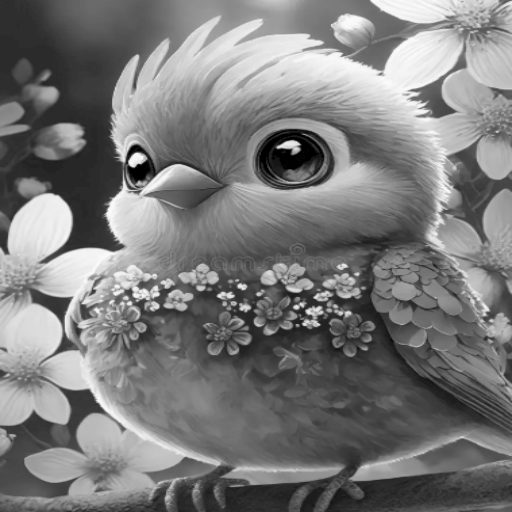

Sobel Edge Detection (Combined X and Y):


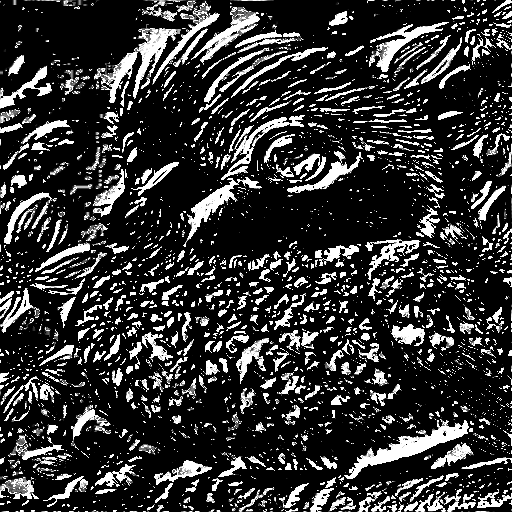

Canny Edge Detection (Adaptive Thresholding):


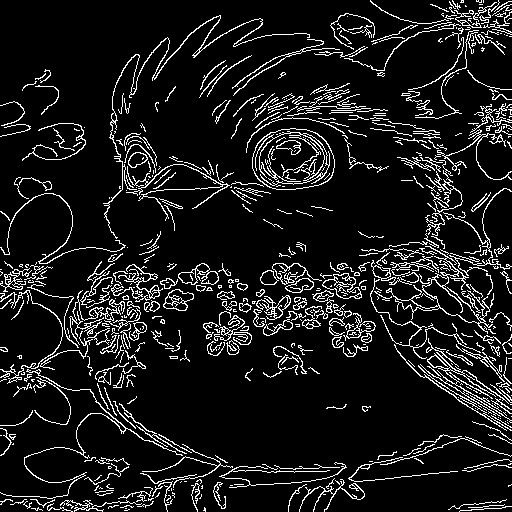

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files


image = cv2.imread("/content/Screenshot 2025-03-09 151333 (1).png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

median_val = np.median(image)
lower_thresh = int(max(0, 0.66 * median_val))
upper_thresh = int(min(255, 1.33 * median_val))
canny_edges = cv2.Canny(image, lower_thresh, upper_thresh)

print("Original Image:")
cv2_imshow(image)

print("Sobel Edge Detection (Combined X and Y):")
cv2_imshow(sobel_combined)

print("Canny Edge Detection (Adaptive Thresholding):")
cv2_imshow(canny_edges)


**5.Object Detection with OpenCV
● Detect simple objects like faces, eyes, or hands using
OpenCV and Haar cascades.
● Libraries: OpenCV, NumPy**

Detected Faces and Eyes:


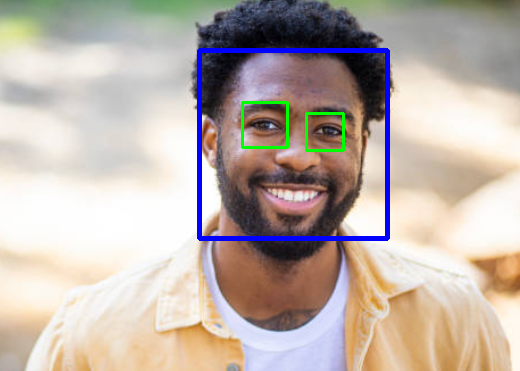

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files



image = cv2.imread("/content/Screenshot 2025-03-09 154401.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
print("Detected Faces and Eyes:")
cv2_imshow(image)
